In [1]:
import pathlib
import os

pwd = pathlib.Path().absolute()
print(pwd)

rfml_dir = pwd.parent
base_dir = rfml_dir.parent

/Users/zephyr/Desktop/大四课程/Individual Project/03-Code/RF Signal Classification/RF_Classification/RF_Classification/rfml/tests


In [2]:
# add rfml_dir to path
import sys
sys.path.append(str(base_dir))

In [3]:
import os, torch
import numpy as np
from rfml.data import build_dataset


train, val, test, le = build_dataset(
    dataset_name="RML2016.10a", path= str(rfml_dir / "data/RML2016.10a_dict.pkl")
)

In [7]:
train.df

,Modulation,SNR,Q,I
18160,8PSK,16,"[-0.0061211707, -0.0034814503, -0.0009374027, ...","[-0.0040742606, -0.0045469254, -0.0052896887, ..."
18198,8PSK,16,"[0.003098104, 0.0053739944, 0.007013215, 0.008...","[0.0003843497, -0.0006984539, -0.0013587791, -..."
18552,8PSK,16,"[0.0037095044, 0.0060207522, 0.007901315, 0.00...","[0.0033799324, 0.0026528698, 0.002321824, 0.00..."
18201,8PSK,16,"[0.0041837785, 0.0052543595, 0.005987367, 0.00...","[-0.0071352697, -0.0072755115, -0.0071857907, ..."
18803,8PSK,16,"[0.0072772196, 0.007040807, 0.005708869, 0.003...","[0.005321815, 0.0057324837, 0.005817386, 0.005..."
...,...,...,...,...
180310,QPSK,-20,"[0.0060035684, -0.01068728, 0.0005231039, -0.0...","[-0.008298468, -0.005114532, 0.0062442943, -0...."
180382,QPSK,-20,"[0.007554376, -0.008111775, 0.0023125317, -0.0...","[-0.0019085406, -0.0033182793, -0.005368021, 0..."
180041,QPSK,-20,"[0.002215751, -0.002689939, -0.0025014023, 0.0...","[0.0020758177, -0.005690162, -0.00712541, 0.00..."
180185,QPSK,-20,"[-0.0076827975, 0.00062368845, 0.00943505, -0....","[0.003725713, -0.020996002, -0.0032235866, -0...."


In [34]:
# get the first sample of the training set: train.df
sample = train.df.iloc[0]
sample


Modulation                                                 8PSK
SNR                                                          16
Q             [-0.0061211707, -0.0034814503, -0.0009374027, ...
I             [-0.0040742606, -0.0045469254, -0.0052896887, ...
Name: 18160, dtype: object

In [36]:
# I need a (2, 128) numpy array
I = sample["I"]
Q = sample["Q"]
Modulation = sample["Modulation"]
print(I.shape, Q.shape, Modulation)


(128,) (128,) 8PSK


<Figure size 640x480 with 0 Axes>

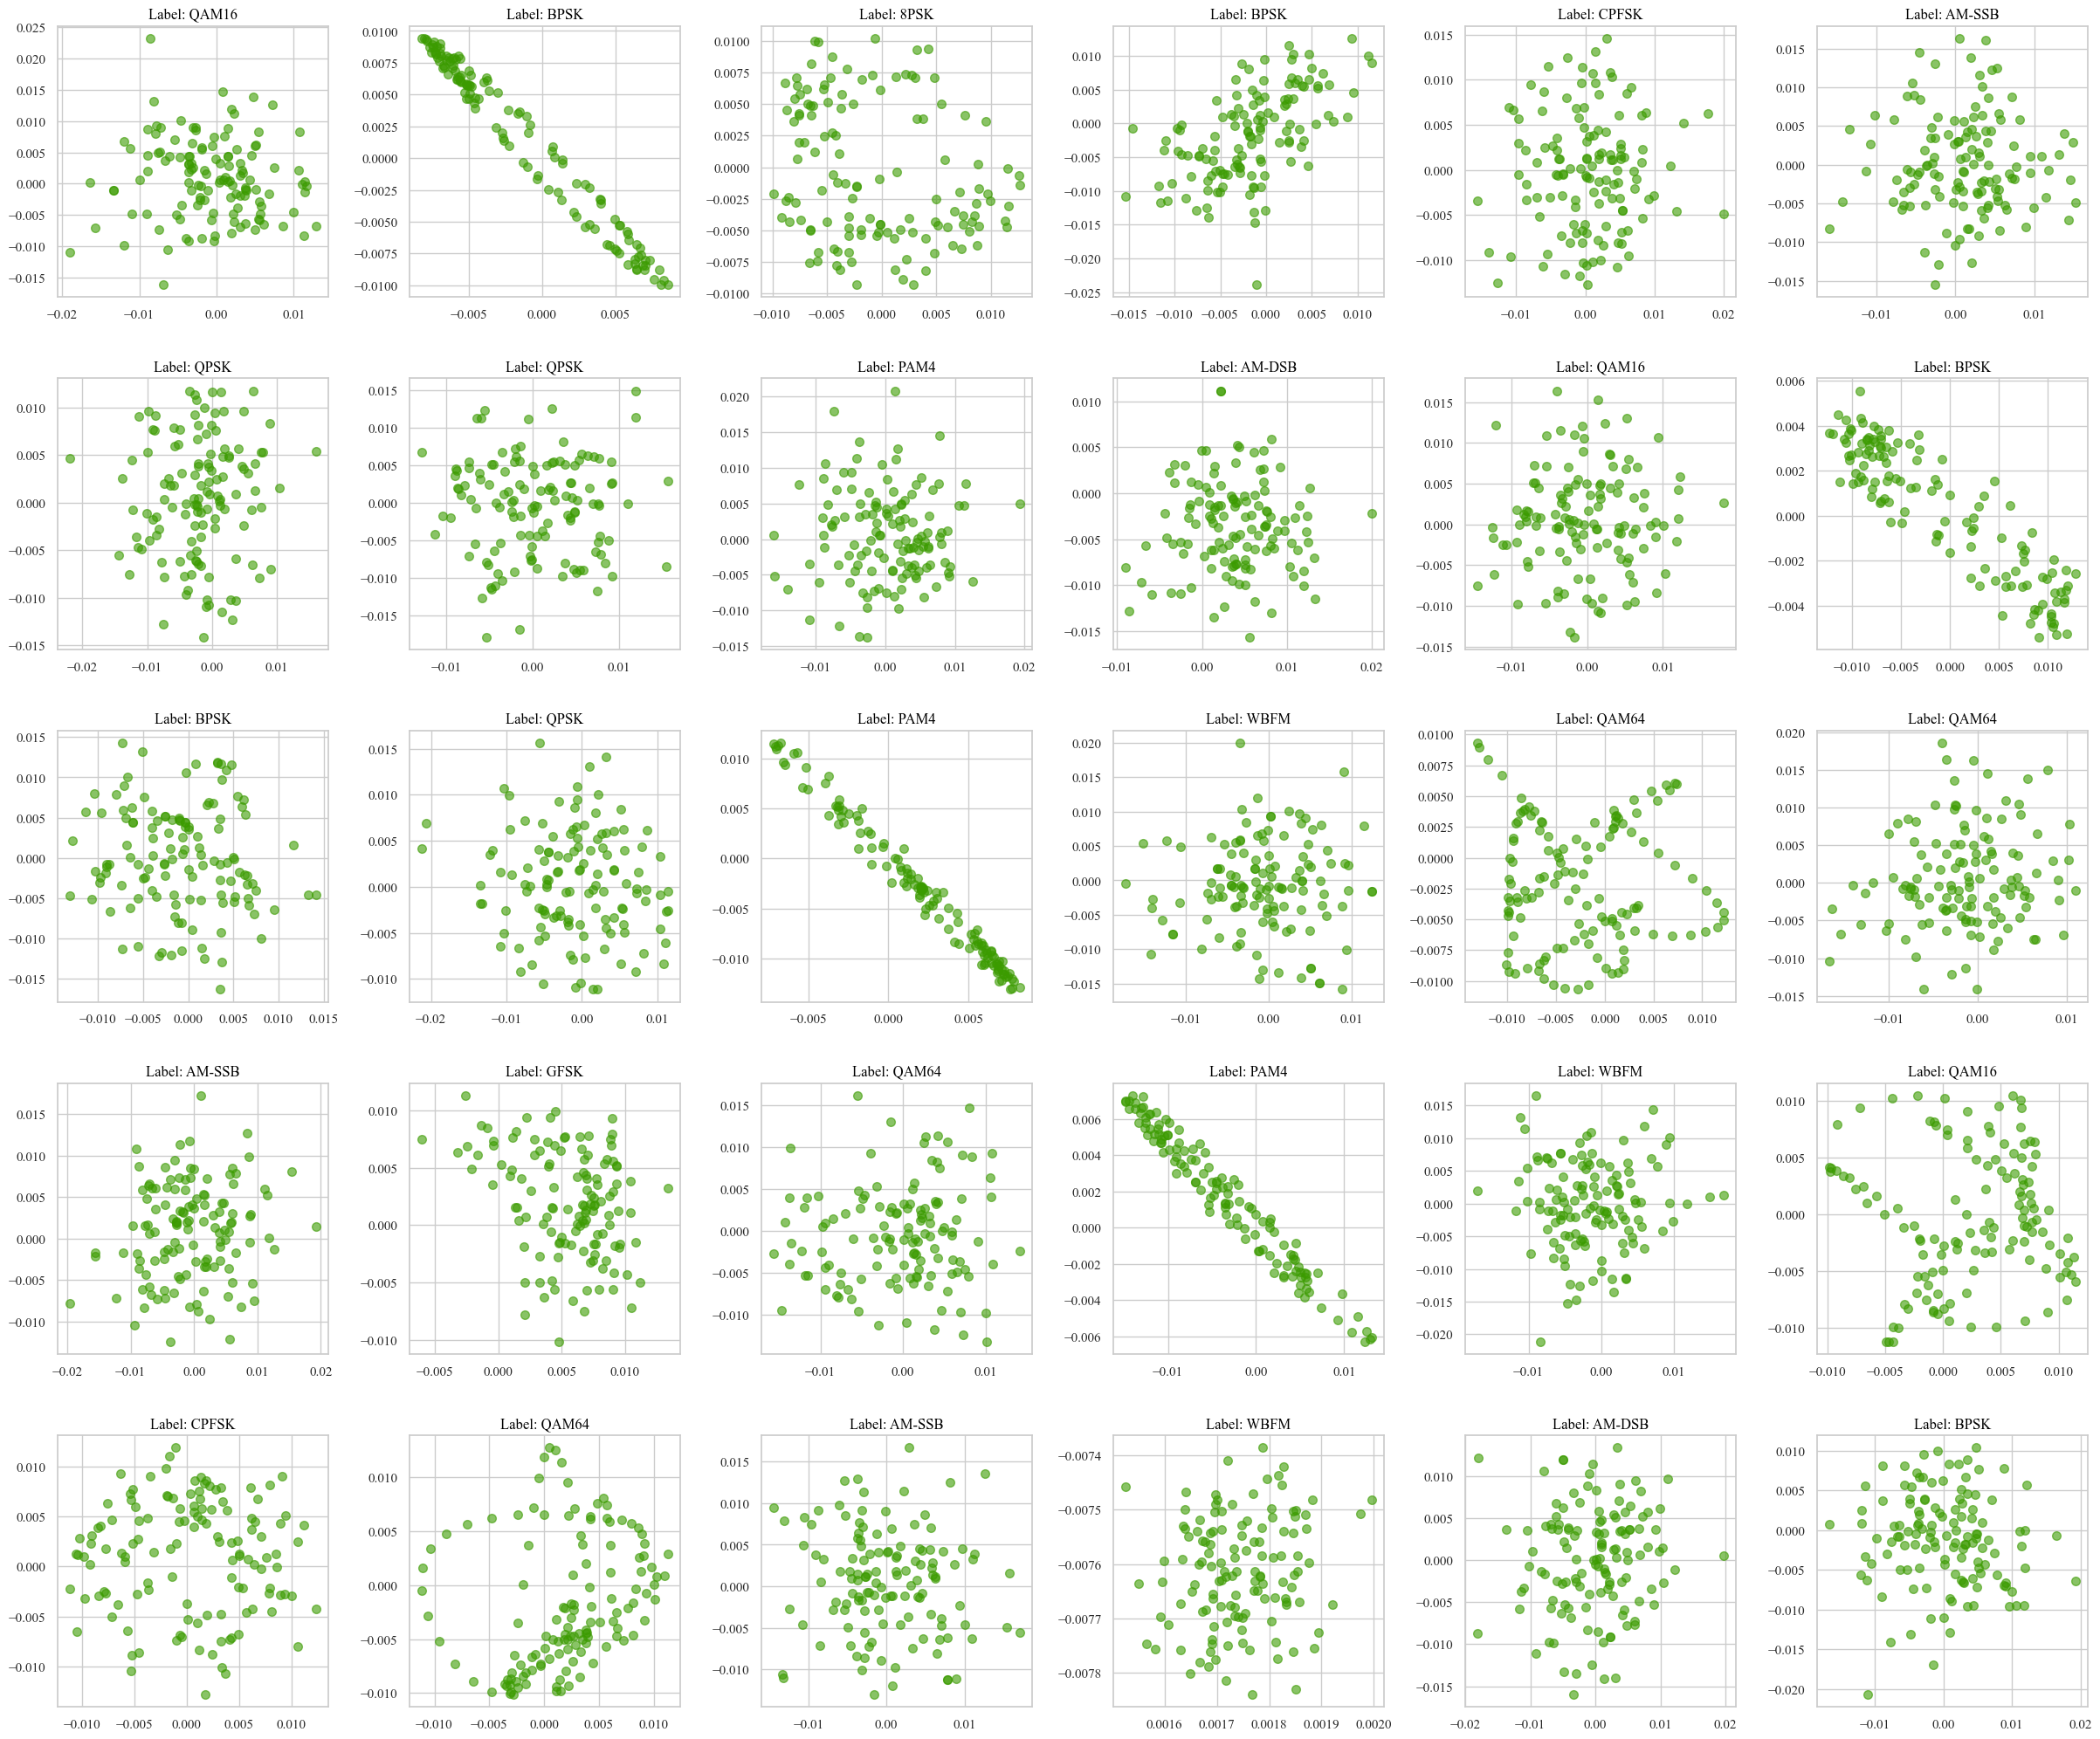

In [67]:
# 用 3*2 的6宫格展示前6个样本
import matplotlib.pyplot as plt

# clear the figure
plt.clf()

num_samples = 30
row_num = 5
col_num = 6

# samples = batch_sample[0][:num_samples]
# labels = batch_sample[1][:num_samples]  # torch.Size([6])

samples = []
labels = []
# for i in range(num_samples):
#     sample = train.df.iloc[i]
#     I = sample["I"]
#     Q = sample["Q"]
#     samples.append(np.stack([I, Q], axis=1))
#     labels.append(sample["Modulation"])

# 随机选择
for i in range(num_samples):
    idx = np.random.randint(0, len(train.df))
    sample = train.df.iloc[idx]
    I = sample["I"]
    Q = sample["Q"]
    samples.append(np.stack([I, Q], axis=1))
    labels.append(sample["Modulation"])


# title: Samples of RF1024 data

plt.figure(figsize=(col_num*5, row_num*5),  facecolor='none')
# 最外面的x, y轴不显示
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.grid(False)
plt.axis('off')

for i in range(num_samples):
    plt.subplot(row_num, col_num, i+1)
    plt.grid(True)
    plt.axis('on')
    # line color: #203b71, use point, on line, 每个点需要透明度=30%， 不要连线
    # plt.plot(samples[i][0][:, 0], samples[i][0][:, 1], color='#203b71', marker='o', markersize=2, alpha=0.7, linestyle='None')
    plt.plot(samples[i][:, 0], samples[i][:, 1], color='#3B9B00', marker='o', markersize=7, alpha=0.6, linestyle='None')
    plt.title(f"Label: {labels[i]}")

# , transparent=True, bbox_inches='tight'
# black grid lin
plt.savefig("ml2016_samples_dpi_100.png", dpi=100)

plt.show()

# EDA

## Data Distribution

In [62]:

train.df

,Modulation,SNR,Q,I,avg_Q,avg_I,std_Q,std_I
18160,8PSK,16,"[-0.0061211707, -0.0034814503, -0.0009374027, ...","[-0.0040742606, -0.0045469254, -0.0052896887, ...",0.002290,0.000927,0.005370,0.005324
18198,8PSK,16,"[0.003098104, 0.0053739944, 0.007013215, 0.008...","[0.0003843497, -0.0006984539, -0.0013587791, -...",0.001371,0.001022,0.005660,0.005520
18552,8PSK,16,"[0.0037095044, 0.0060207522, 0.007901315, 0.00...","[0.0033799324, 0.0026528698, 0.002321824, 0.00...",-0.000055,0.001675,0.006007,0.005259
18201,8PSK,16,"[0.0041837785, 0.0052543595, 0.005987367, 0.00...","[-0.0071352697, -0.0072755115, -0.0071857907, ...",-0.000824,0.001723,0.005681,0.005289
18803,8PSK,16,"[0.0072772196, 0.007040807, 0.005708869, 0.003...","[0.005321815, 0.0057324837, 0.005817386, 0.005...",0.001177,-0.001365,0.005489,0.005828
...,...,...,...,...,...,...,...,...
180310,QPSK,-20,"[0.0060035684, -0.01068728, 0.0005231039, -0.0...","[-0.008298468, -0.005114532, 0.0062442943, -0....",0.001031,-0.000224,0.005788,0.006481
180382,QPSK,-20,"[0.007554376, -0.008111775, 0.0023125317, -0.0...","[-0.0019085406, -0.0033182793, -0.005368021, 0...",0.000761,-0.000568,0.006269,0.006150
180041,QPSK,-20,"[0.002215751, -0.002689939, -0.0025014023, 0.0...","[0.0020758177, -0.005690162, -0.00712541, 0.00...",0.000087,-0.000850,0.006443,0.005987
180185,QPSK,-20,"[-0.0076827975, 0.00062368845, 0.00943505, -0....","[0.003725713, -0.020996002, -0.0032235866, -0....",-0.001052,-0.001034,0.006055,0.006183


In [63]:
train.df["avg_Q"] = train.df["Q"].apply(lambda x: np.mean(x))
train.df["avg_I"] = train.df["I"].apply(lambda x: np.mean(x))
train.df["std_Q"] = train.df["Q"].apply(lambda x: np.std(x))
train.df["std_I"] = train.df["I"].apply(lambda x: np.std(x))

In [64]:
train.df

,Modulation,SNR,Q,I,avg_Q,avg_I,std_Q,std_I
18160,8PSK,16,"[-0.0061211707, -0.0034814503, -0.0009374027, ...","[-0.0040742606, -0.0045469254, -0.0052896887, ...",0.002290,0.000927,0.005370,0.005324
18198,8PSK,16,"[0.003098104, 0.0053739944, 0.007013215, 0.008...","[0.0003843497, -0.0006984539, -0.0013587791, -...",0.001371,0.001022,0.005660,0.005520
18552,8PSK,16,"[0.0037095044, 0.0060207522, 0.007901315, 0.00...","[0.0033799324, 0.0026528698, 0.002321824, 0.00...",-0.000055,0.001675,0.006007,0.005259
18201,8PSK,16,"[0.0041837785, 0.0052543595, 0.005987367, 0.00...","[-0.0071352697, -0.0072755115, -0.0071857907, ...",-0.000824,0.001723,0.005681,0.005289
18803,8PSK,16,"[0.0072772196, 0.007040807, 0.005708869, 0.003...","[0.005321815, 0.0057324837, 0.005817386, 0.005...",0.001177,-0.001365,0.005489,0.005828
...,...,...,...,...,...,...,...,...
180310,QPSK,-20,"[0.0060035684, -0.01068728, 0.0005231039, -0.0...","[-0.008298468, -0.005114532, 0.0062442943, -0....",0.001031,-0.000224,0.005788,0.006481
180382,QPSK,-20,"[0.007554376, -0.008111775, 0.0023125317, -0.0...","[-0.0019085406, -0.0033182793, -0.005368021, 0...",0.000761,-0.000568,0.006269,0.006150
180041,QPSK,-20,"[0.002215751, -0.002689939, -0.0025014023, 0.0...","[0.0020758177, -0.005690162, -0.00712541, 0.00...",0.000087,-0.000850,0.006443,0.005987
180185,QPSK,-20,"[-0.0076827975, 0.00062368845, 0.00943505, -0....","[0.003725713, -0.020996002, -0.0032235866, -0....",-0.001052,-0.001034,0.006055,0.006183


<Figure size 640x480 with 0 Axes>

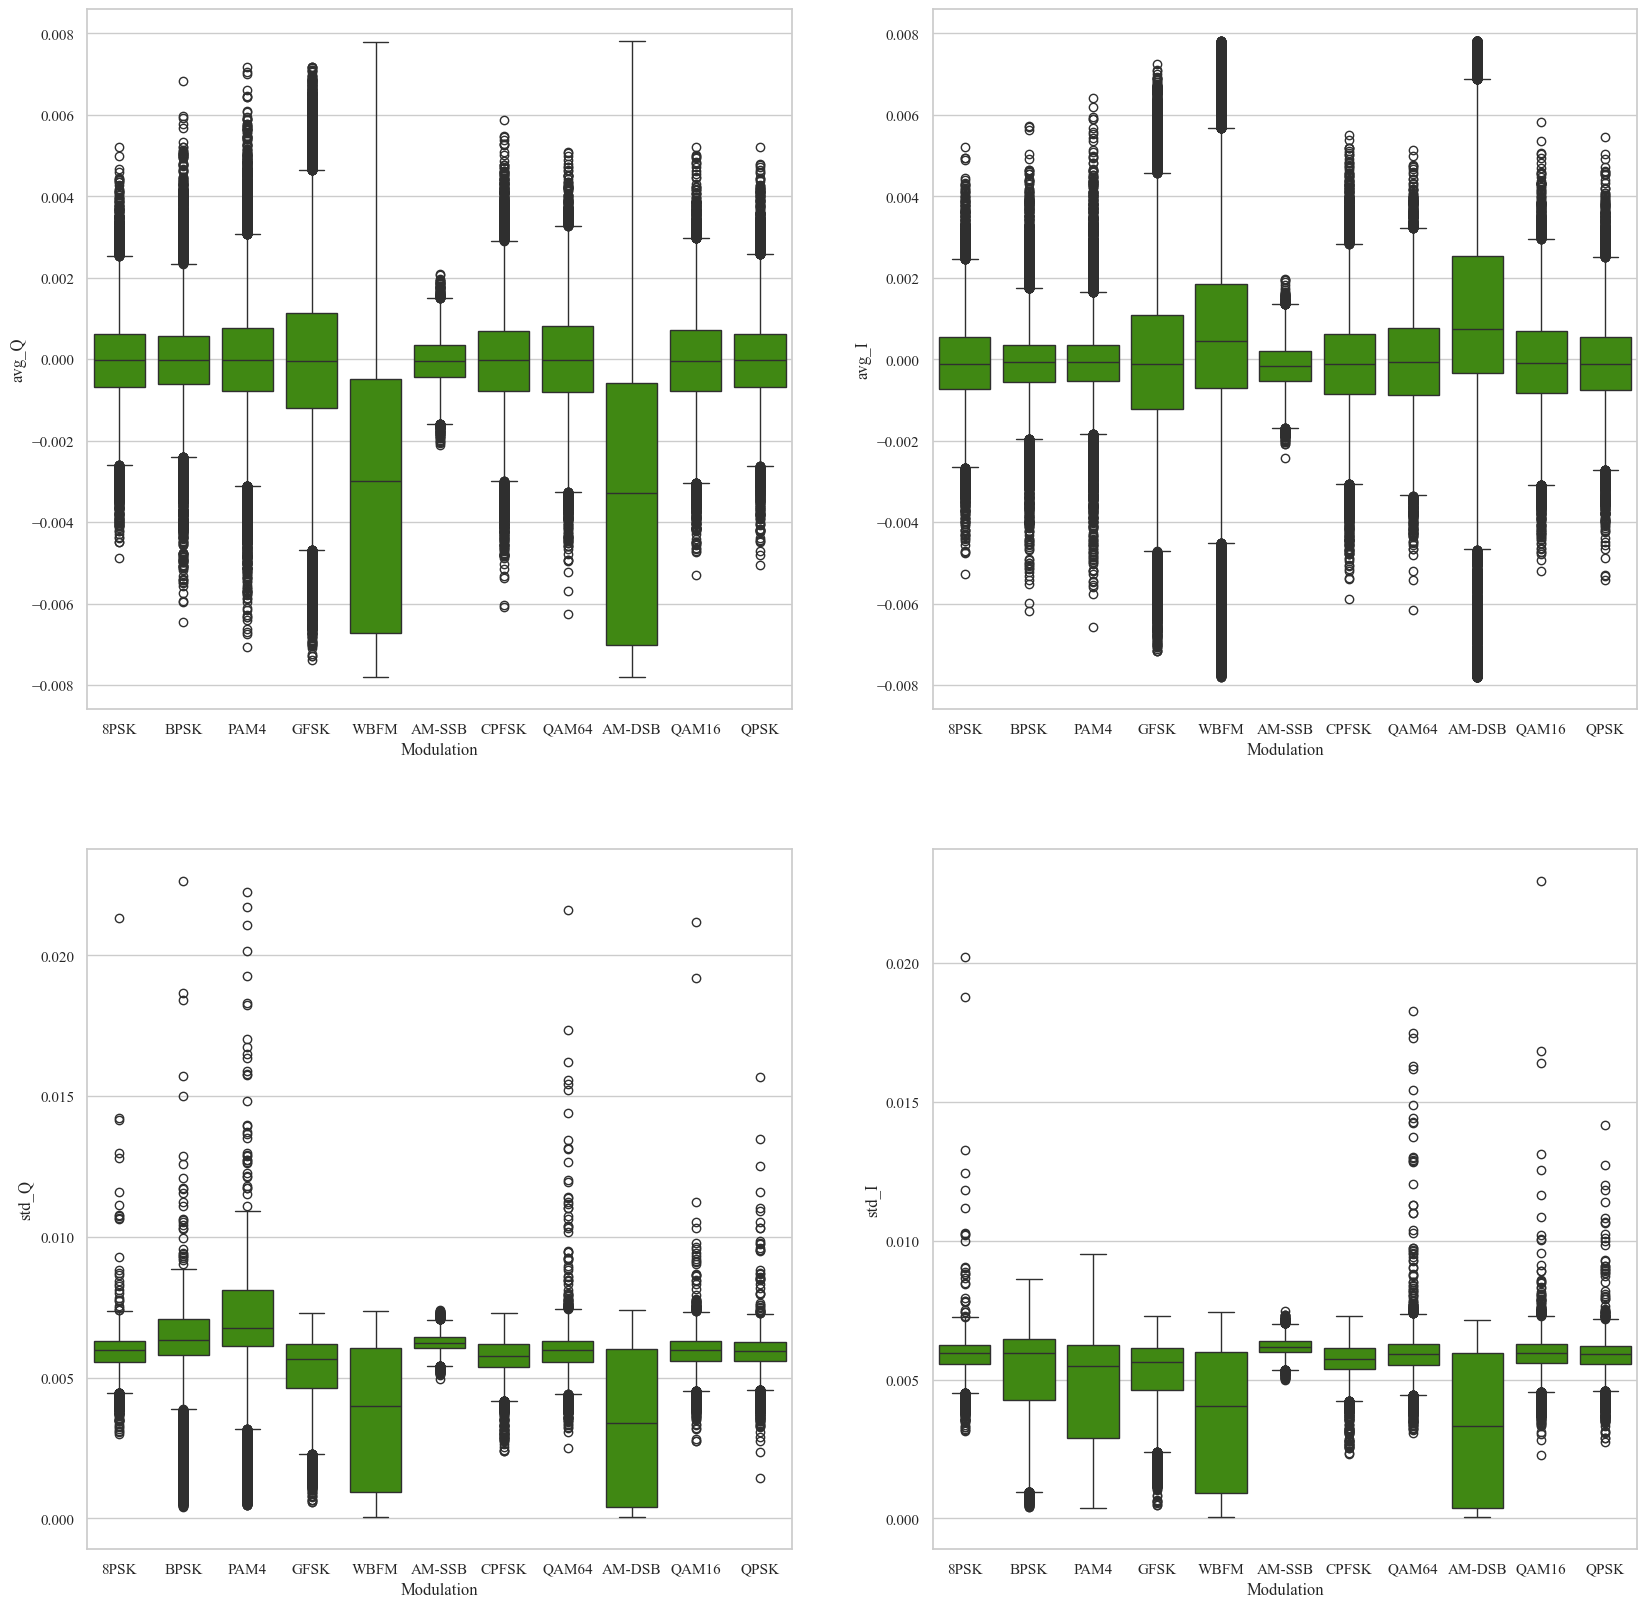

In [66]:
# 分别绘制绘制 avg_Q、avg_I、std_Q、std_I 的相对于mod的分布图
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.set(style="whitegrid")

# font: times new roman, black
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.color"] = "black"
color='#3B9B00'
alpha = 0.7

# title: Distribution of avg_Q, avg_I, std_Q, std_I

fig, axes = plt.subplots(2, 2, figsize=(20, 20), facecolor='none')

sns.boxplot(x="Modulation", y="avg_Q", data=train.df, ax=axes[0, 0], color=color)
sns.boxplot(x="Modulation", y="avg_I", data=train.df, ax=axes[0, 1], color=color)
sns.boxplot(x="Modulation", y="std_Q", data=train.df, ax=axes[1, 0], color=color)
sns.boxplot(x="Modulation", y="std_I", data=train.df, ax=axes[1, 1], color=color)

plt.savefig("ml2016_avg_std.png", dpi=300)
plt.show()